# **Importing Libraries**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn import tree
import joblib
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from matplotlib import pyplot as plt

# **Importing the dataset**

In [ ]:

ds = pd.read_csv('Cryotherapy.csv')

In [ ]:
ds.head(150)

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0
...,...,...,...,...,...,...,...
85,2,34,12.00,3,3,95,0
86,2,20,3.50,6,1,75,1
87,2,35,8.25,8,3,100,0
88,1,24,10.75,10,1,20,1


In [ ]:
ds_copy = ds.copy()

# **Description of the dataset**

In [ ]:
description=ds_copy.describe()
description.head()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.477778,28.600000,7.666667,5.511111,1.700000,85.833333,0.533333
std,0.502304,13.360852,3.406661,3.567155,0.905042,131.733153,0.501683
min,1.000000,15.000000,0.250000,1.000000,1.000000,4.000000,0.000000
25%,1.000000,18.000000,4.562500,2.000000,1.000000,20.000000,0.000000


# **Plotting Frequency Distribution of all the attributes**

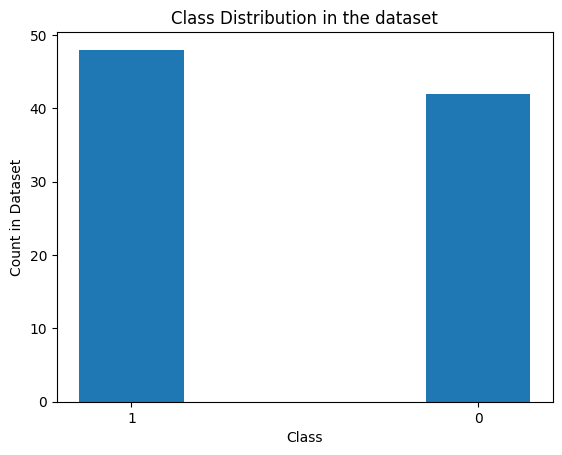

In [ ]:
df1 = ds_copy['Result_of_Treatment'].value_counts()
X_sex = []
Y_sex = []
for key, value in df1.to_dict().items():
    X_sex.append(f"{key}")
    Y_sex.append(value)
plt.bar(X_sex, Y_sex, width=0.3)
plt.xlabel("Class")
plt.ylabel("Count in Dataset")
plt.title("Class Distribution in the dataset")
plt.show()

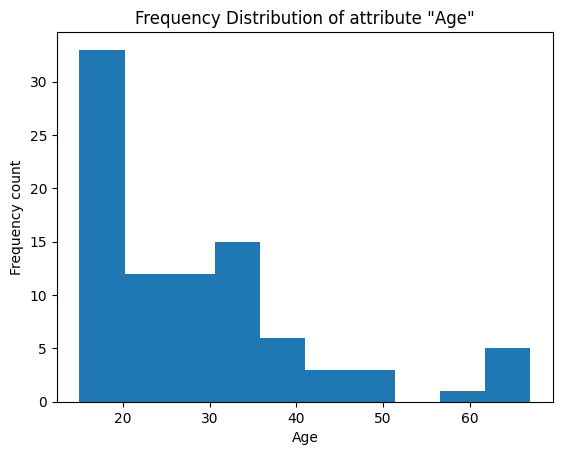

In [ ]:
plt.hist(ds_copy['age'])
plt.ylabel('Frequency count')
plt.xlabel('Age');
plt.title('Frequency Distribution of attribute "Age"')
plt.show()

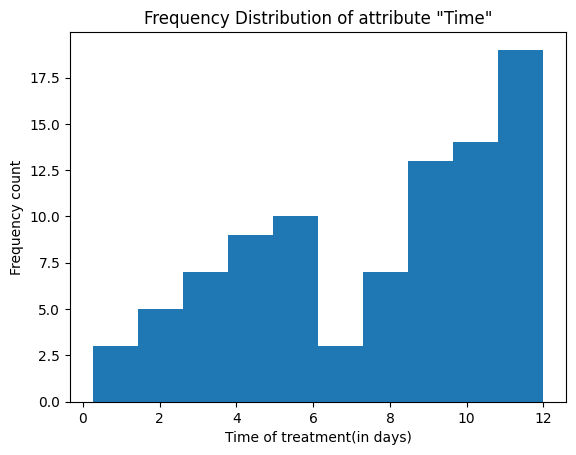

In [ ]:
plt.hist(ds_copy['Time'])
plt.ylabel('Frequency count')
plt.xlabel('Time of treatment(in days)');
plt.title('Frequency Distribution of attribute "Time"')
plt.show()

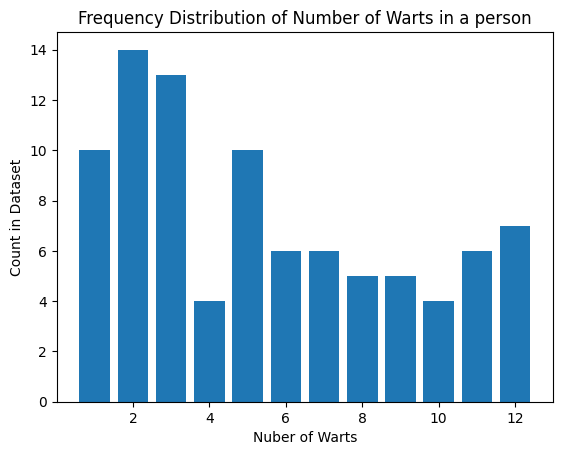

In [ ]:
df1 = ds_copy['Number_of_Warts'].value_counts()
X_age = []
Y_age = []
for key, value in df1.to_dict().items():
    X_age.append(key)
    Y_age.append(value)
plt.bar(X_age, Y_age)
plt.xlabel("Nuber of Warts")
plt.ylabel("Count in Dataset")
plt.title("Frequency Distribution of Number of Warts in a person")
plt.show()

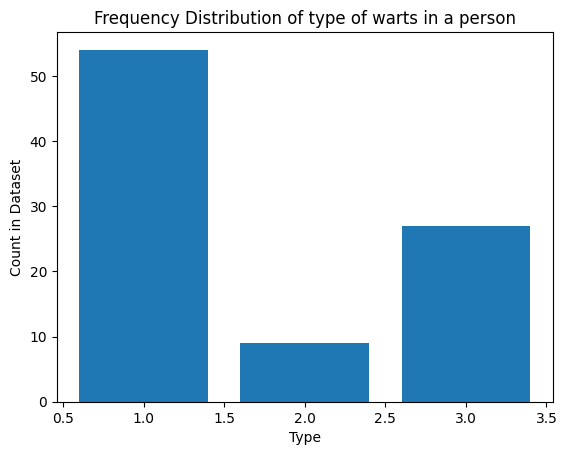

In [ ]:
df1 = ds_copy['Type'].value_counts()
X_Age = []
Y_Age = []
temp = []
df1_dict = df1.to_dict()
for i in sorted(df1_dict.keys()):
  temp.append(i)
for key in temp:
    X_Age.append(key)
    Y_Age.append(df1_dict[key])
plt.bar(X_Age, Y_Age)
plt.xlabel("Type")
plt.ylabel("Count in Dataset")
plt.title("Frequency Distribution of type of warts in a person")
plt.show()

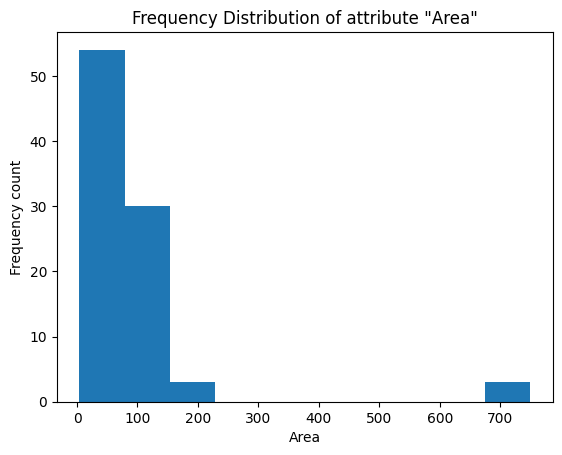

In [ ]:
plt.hist(ds_copy['Area'])
plt.ylabel('Frequency count')
plt.xlabel('Area');
plt.title('Frequency Distribution of attribute "Area"')
plt.show()


# **Extracting Attributes and target classes**

In [ ]:
X_full = ds.values[:, 0:6]
Y_full = ds.values[:, 6:7]


# **Generating datasets by bootstrap method**

In [ ]:
def generateDataset(i):
  df1 = ds.sample(n=len(ds), axis='rows', replace=True)
  df1_X = df1.copy()
  df1_res = df1_X.pop("Result_of_Treatment")
  df1_sample = df1_X.sample(n=4, axis='columns')
  df1_sample["Result_of_Treatment"] = df1_res
  df1_sample.to_csv(f'Data_Sample_{i}.csv', header=True, index=False)
  print(f"Data_Sample_{i} saved")


# **Printing instances of all the generated datasets**

In [ ]:
data = pd.read_csv(f'Data_Sample_1.csv')
data.head(len(data))

,sex,Time,Area,Number_of_Warts,Result_of_Treatment
0,2,10.50,35,5,0
1,1,5.50,6,5,1
2,2,9.50,72,5,0
3,1,9.25,42,1,0
4,2,10.75,35,5,0
...,...,...,...,...,...
85,1,2.75,20,3,0
86,2,8.75,6,2,0
87,1,11.00,8,2,0
88,1,8.75,132,11,0


In [ ]:
data = pd.read_csv(f'Data_Sample_{2}.csv')
data.head(len(data))

,Time,Number_of_Warts,sex,Type,Result_of_Treatment
0,4.75,3,1,1,1
1,9.25,1,1,1,0
2,8.25,8,2,3,0
3,5.75,1,2,1,1
4,8.50,1,2,2,1
...,...,...,...,...,...
85,2.75,3,1,3,0
86,12.00,1,1,3,0
87,11.00,2,2,1,0
88,3.75,11,1,1,1


In [ ]:
data = pd.read_csv(f'Data_Sample_{3}.csv')
data.head(len(data))

,sex,Number_of_Warts,Area,age,Result_of_Treatment
0,1,11,20,67,0
1,2,6,160,19,1
2,2,6,8,36,0
3,1,5,6,27,0
4,1,2,10,17,0
...,...,...,...,...,...
85,1,3,20,63,0
86,1,7,72,23,0
87,2,2,20,41,1
88,2,10,70,15,1


In [ ]:
data = pd.read_csv(f'Data_Sample_{4}.csv')
data.head(len(data))


,age,Time,Area,sex,Result_of_Treatment
0,41,8.00,20,1,1
1,17,5.25,63,1,1
2,15,6.00,30,2,1
3,15,3.75,70,2,1
4,35,8.25,100,2,0
...,...,...,...,...,...
85,24,9.50,20,1,1
86,41,7.75,20,2,1
87,15,10.50,30,1,1
88,40,9.75,80,2,0


In [ ]:
data = pd.read_csv(f'Data_Sample_{5}.csv')
data.head(len(data))


,Number_of_Warts,Time,sex,age,Result_of_Treatment
0,7,10.50,1,27,0
1,2,8.75,2,27,0
2,3,2.00,2,15,1
3,11,2.00,1,15,1
4,12,1.50,2,15,1
...,...,...,...,...,...
85,8,4.50,2,18,1
86,3,5.00,1,20,1
87,2,11.00,1,36,0
88,5,10.50,2,21,0


In [ ]:
data = pd.read_csv(f'Data_Sample_{6}.csv')
data.head(len(data))

,age,Number_of_Warts,Area,Type,Result_of_Treatment
0,50,11,132,3,0
1,67,7,42,1,0
2,19,9,160,1,1
3,19,9,160,1,1
4,40,9,80,2,0
...,...,...,...,...,...
85,35,5,100,1,0
86,22,2,70,1,1
87,20,3,6,1,1
88,67,7,42,1,0


# **Training the classifiers, testing them and finding out the accuracy**

In [ ]:
def trainDT(i, X_train, Y_train, X_test, Y_test, atr_list):
  clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5)
  clf = clf.fit(X_train,Y_train)
  Y_pred = clf.predict(X_test)
  print(f"Accuracy score for Dataset numbered {i} is {accuracy_score(Y_test, Y_pred)*100}%")
  joblib.dump(clf, f"dc{i}.pkl")
  print(f"dc{i} model saved")
  dot_data = StringIO()
  export_graphviz(clf, out_file=dot_data,
                  filled=True, rounded=True,
                  special_characters=True, feature_names=atr_list, class_names=['No','Yes'])
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  graph.write_png(f'dc{i}.png')
  Image(graph.create_png())
  print(f"dc{i} visual saved\n")

In [ ]:
for i in range(0, 6):
  dataset_temp = pd.read_csv(f'Data_Sample_{i+1}.csv')
  atr_list = []
  for col in dataset_temp.columns:
    atr_list.append(col)
  atr_list.pop()
  X = dataset_temp.values[:, 0:4]
  Y = dataset_temp.values[:, 4:5]
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
  trainDT(i+1, X_train, Y_train, X_test, Y_test, atr_list)

Accuracy score for Dataset numbered 1 is 92.5925925925926%
dc1 model saved
dc1 visual saved

Accuracy score for Dataset numbered 2 is 96.29629629629629%
dc2 model saved
dc2 visual saved

Accuracy score for Dataset numbered 3 is 70.37037037037037%
dc3 model saved
dc3 visual saved

Accuracy score for Dataset numbered 4 is 81.48148148148148%
dc4 model saved
dc4 visual saved

Accuracy score for Dataset numbered 5 is 81.48148148148148%
dc5 model saved
dc5 visual saved

Accuracy score for Dataset numbered 6 is 85.18518518518519%
dc6 model saved
dc6 visual saved



# **Using all 6 classifiers to make a prediction model using Bagging**

In [ ]:
def predictSingle(X):
  result0 = 0
  result1 = 0
  X = [[X[0], X[2], X[5], X[3]],
          [X[2], X[3], X[0], X[4]],
          [X[0], X[3], X[5], X[1]],
          [X[1], X[2], X[5], X[0]],
          [X[3], X[2], X[0], X[1]],
          [X[1], X[3], X[5], X[4]]]
  for i in range(0, 6):
    clf = joblib.load(f'dc{i+1}.pkl')
    Y = clf.predict([X[i]])
    Y = Y[0]
    if Y == 0:
      result0 += 1
    else:
      result1 += 1
  if result0 > result1:
    return 0
  else:
    return 1

In [48]:
print(predictSingle([1, 67, 10, 7, 1, 42]))

0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use 

# **Finding out Accuracy, precision, recall and F-1 score of the final model**

In [49]:
Y_pred = []
for x in X_full:
  Y_pred.append(predictSingle(x))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use 

In [ ]:
print(f'Accuracy of the model is {accuracy_score(Y_full, np.array(Y_pred))}')
print(f'Precision of the model is {precision_score(Y_full, np.array(Y_pred))}')
print(f'Recall of the model is {recall_score(Y_full, np.array(Y_pred))}')
print(f'F1-Score of the model is {f1_score(Y_full, np.array(Y_pred))}')

Accuracy of the model is 0.9666666666666667
Precision of the model is 0.9591836734693877
Recall of the model is 0.9791666666666666
F1-Score of the model is 0.9690721649484536


# **Generating and printing the confusion matrix**

In [ ]:
cm = confusion_matrix(Y_full,np.array(Y_pred))
cm

array([[40,  2],
       [ 1, 47]])

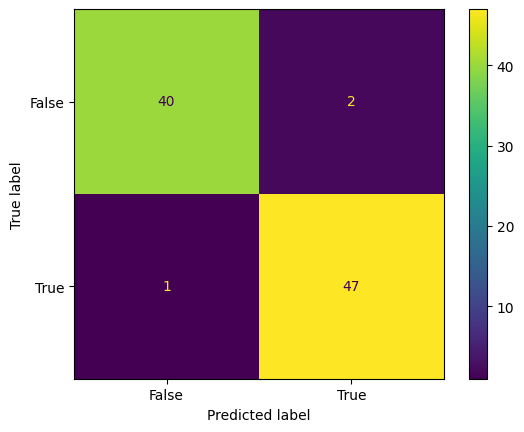

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()